In [1]:
import pandas as pd
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sb

Separate the disasters into 3 different files

In [3]:
df = pd.read_csv('Weather Inserted.csv')

Flood=['FLOOD','CYCLONE & FLOOD','FLASH FLOOD','URBAN FLOOD','COASTLINE','HEAVY RAINS']
Landslide = ['LANDSLIDE','LAND SUBSIDENCE','ROCK FALL','EARTH SLIP','Collapse of Gabage Fill','Collapse of Mine','Subsidence']
Cyclone = ['CYCLONE','COASTLINE','CYCLONE & FLOOD','GALE','HAILSTORM','STORM','STRONG WIND','TIDAL WAVE','TORNADO']

# Categorize disasters
floods = df[df['Disaster'].str.upper().isin(Flood)].reset_index(drop=True).copy()
floods.dropna(subset=['District'], inplace=True)
floods['Flood'] = 1

landslides = df[df['Disaster'].str.upper().isin(Landslide)].reset_index(drop=True).copy()
landslides.dropna(subset=['District'], inplace=True)
landslides['Landslide'] = 1

cyclones = df[df['Disaster'].str.upper().isin(Cyclone)].reset_index(drop=True).copy()
cyclones.dropna(subset=['District'], inplace=True)
cyclones['Cyclone'] = 1


Export to different csv

In [7]:

floods.sort_values(by='Date').to_csv('Flood.csv',index=False)
landslides.sort_values(by='Date').to_csv('Landslide.csv',index=False)
cyclones.sort_values(by='Date').to_csv('Cyclone.csv',index=False)

Plot of Flood vs Month

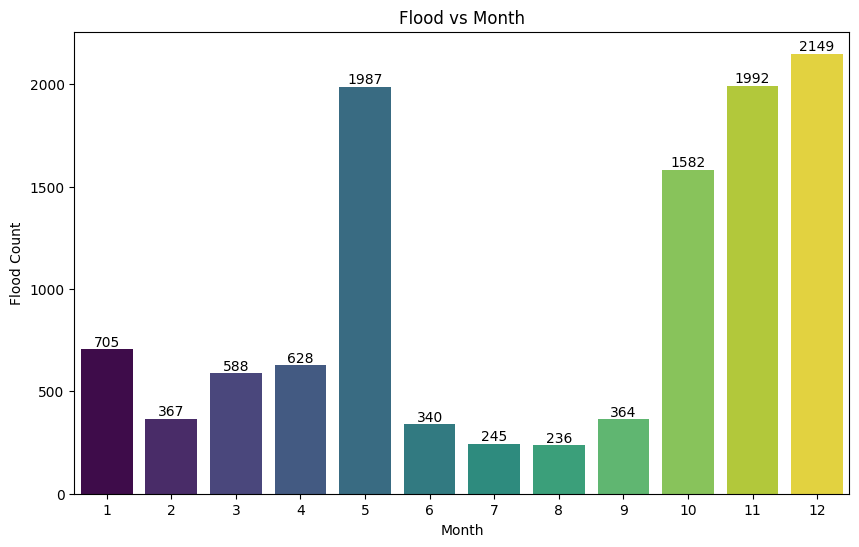

In [8]:
flood_counts = floods['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
barplot = sb.barplot(x=flood_counts.index, y=flood_counts.values, hue=flood_counts.index, palette='viridis', legend=False)

# Annotate each bar with its height using ax.text method
for bar, count in zip(barplot.patches, flood_counts.values):
    barplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{int(count)}',
                ha='center', va='bottom', color='black', fontsize=10)

plt.title('Flood vs Month')
plt.xlabel('Month')
plt.ylabel('Flood Count')
plt.show()


Plot of Landslide vs Month

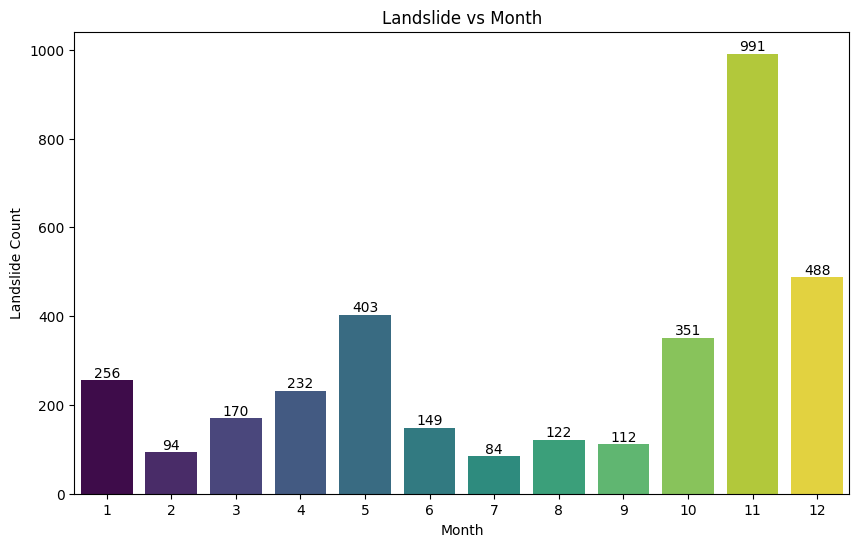

In [9]:
landslide_counts = landslides['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
barplot = sb.barplot(x=landslide_counts.index, y=landslide_counts.values, hue=landslide_counts.index, palette='viridis', legend=False)

# Annotate each bar with its height using ax.text method
for bar, count in zip(barplot.patches, landslide_counts.values):
    barplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{int(count)}',
                ha='center', va='bottom', color='black', fontsize=10)

plt.title('Landslide vs Month')
plt.xlabel('Month')
plt.ylabel('Landslide Count')
plt.show()

Plot Cyclone vs Month

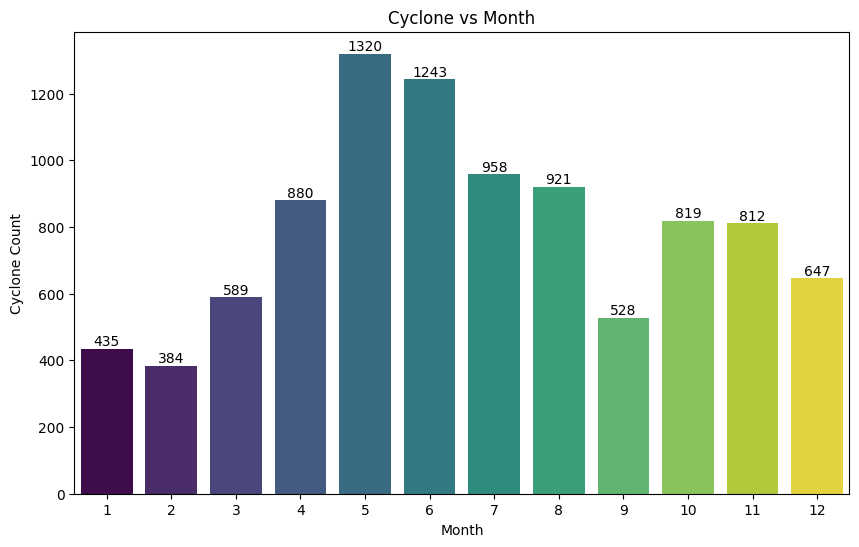

In [10]:
cyclone_counts = cyclones['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
barplot = sb.barplot(x=cyclone_counts.index, y=cyclone_counts.values, hue=cyclone_counts.index, palette='viridis', legend=False)

# Annotate each bar with its height using ax.text method
for bar, count in zip(barplot.patches, cyclone_counts.values):
    barplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{int(count)}',
                ha='center', va='bottom', color='black', fontsize=10)

plt.title('Cyclone vs Month')
plt.xlabel('Month')
plt.ylabel('Cyclone Count')
plt.show()

In [12]:
def generate_random_dates(year, month, num_dates):
    # Convert month names to numeric values
    if pd.notna(year) and pd.notna(month):
        year = int(year)
        month = int(month)

        start_date = datetime(year, month, 1)

        if month == 12:
            next_year = year + 1
            next_month = 1
        else:
            next_year = year
            next_month = month + 1

        end_date = datetime(next_year, next_month, 1) - timedelta(days=1)

        date_strings = [
            (start_date + timedelta(days=random.randint(0, (end_date - start_date).days))).strftime('%Y-%m-%d') for _ in range(num_dates)
        ]

        return [datetime.strptime(date_str, '%Y-%m-%d') for date_str in date_strings]
    else:
        return None

In [13]:
def insert_rows(df,name,serial_number):
    duplicated_rows_list = []
    for _, row in df.iterrows():
        duplicated_row = row.copy()

        
        random_dates = generate_random_dates(row['Year'], row['Month'], 1)

        for random_date in random_dates:
            random_date_str = random_date.strftime('%Y-%m-%d')
            if random_date_str not in df['Date'].values:
                duplicated_row['Serial'] = serial_number
                duplicated_row['Date'] = random_date_str
                duplicated_row[name]=0
                duplicated_rows_list.append(duplicated_row.copy())
                serial_number+=1

    new_df = pd.DataFrame(duplicated_rows_list)
    print()


    combined = pd.concat([df,new_df],ignore_index=True)
    combined.sort_values(by='Date').to_csv(f'Model {name}.csv',index=False)
    
insert_rows(floods,'Flood',20001)
insert_rows(landslides,'Landslide',30001)
insert_rows(cyclones,'Cyclone',40001)
